In [1]:
import numpy as np 
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv("water_potability.csv")

In [7]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [13]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [15]:
## visualising null values with the help of heatmap 1 indicates null values(white refion) and black region represents the not null

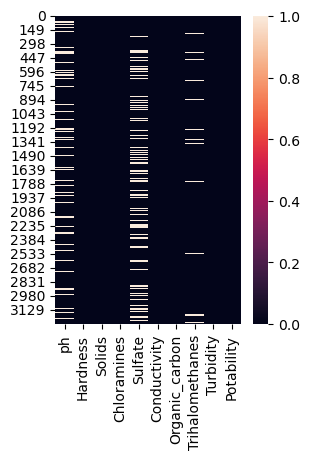

In [19]:
plt.figure(figsize=(3,4))
sns.heatmap(data.isnull())
plt.show()

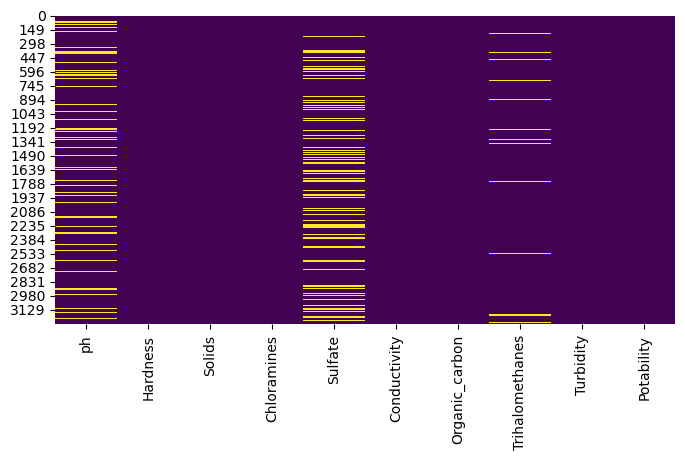

In [21]:
plt.figure(figsize=(8, 4)) 
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

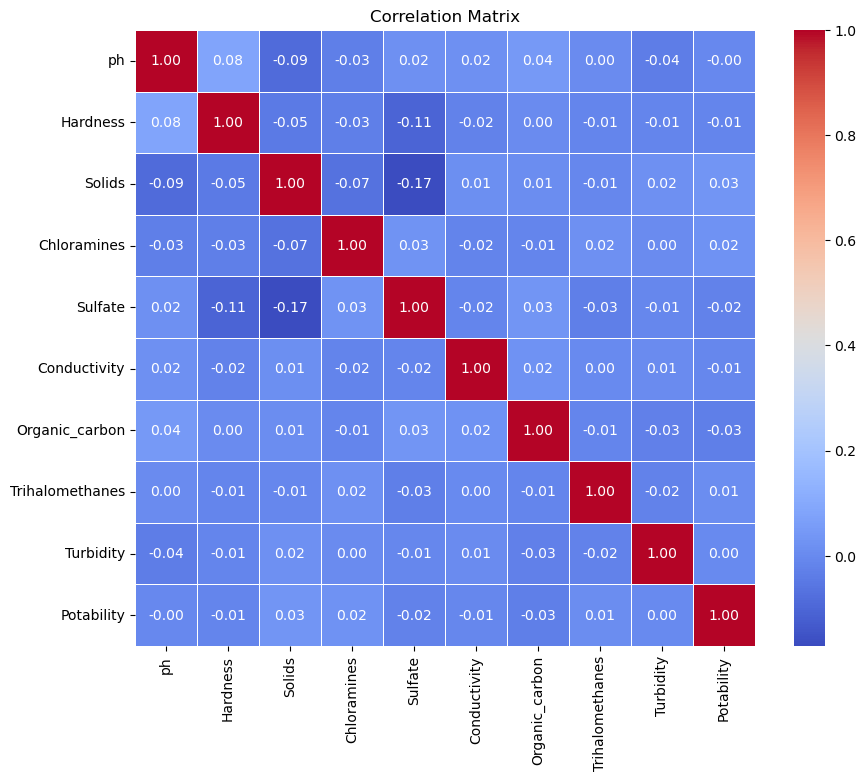

In [23]:

corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [25]:
#  +ve correlation tells the corelation between both the coluns are same means one will increase the other will also increases
# -ve inndicates that the one will increases the other will decreases.
# 0 correlation tells that there is no change .

In [27]:
data.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## checking the potability of water

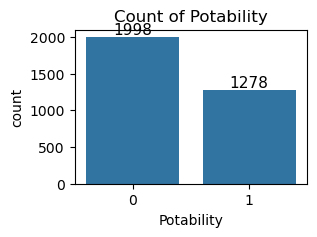

In [30]:
plt.figure(figsize=(3,2))
ax=sns.countplot(x="Potability",data=data)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Potability')
plt.show()

In [ ]:
## 

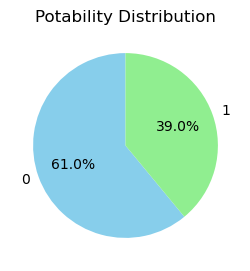

In [32]:
potability_counts = data['Potability'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(potability_counts, labels=potability_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Potability Distribution')
plt.show()

In [34]:
# 61% of water is not potable only 39% water is useful for drinking purpose

## outliers

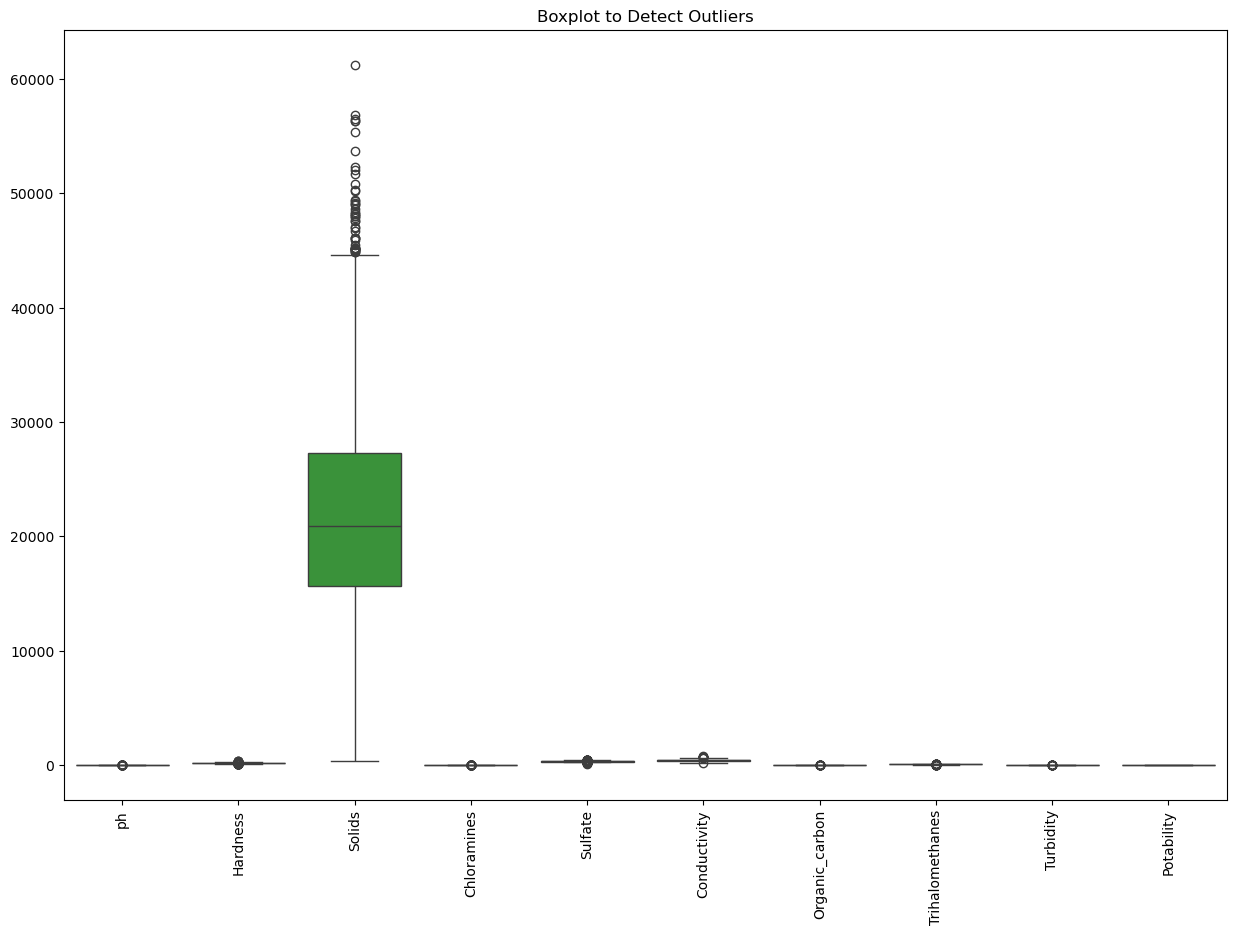

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot to Detect Outliers')
plt.show()

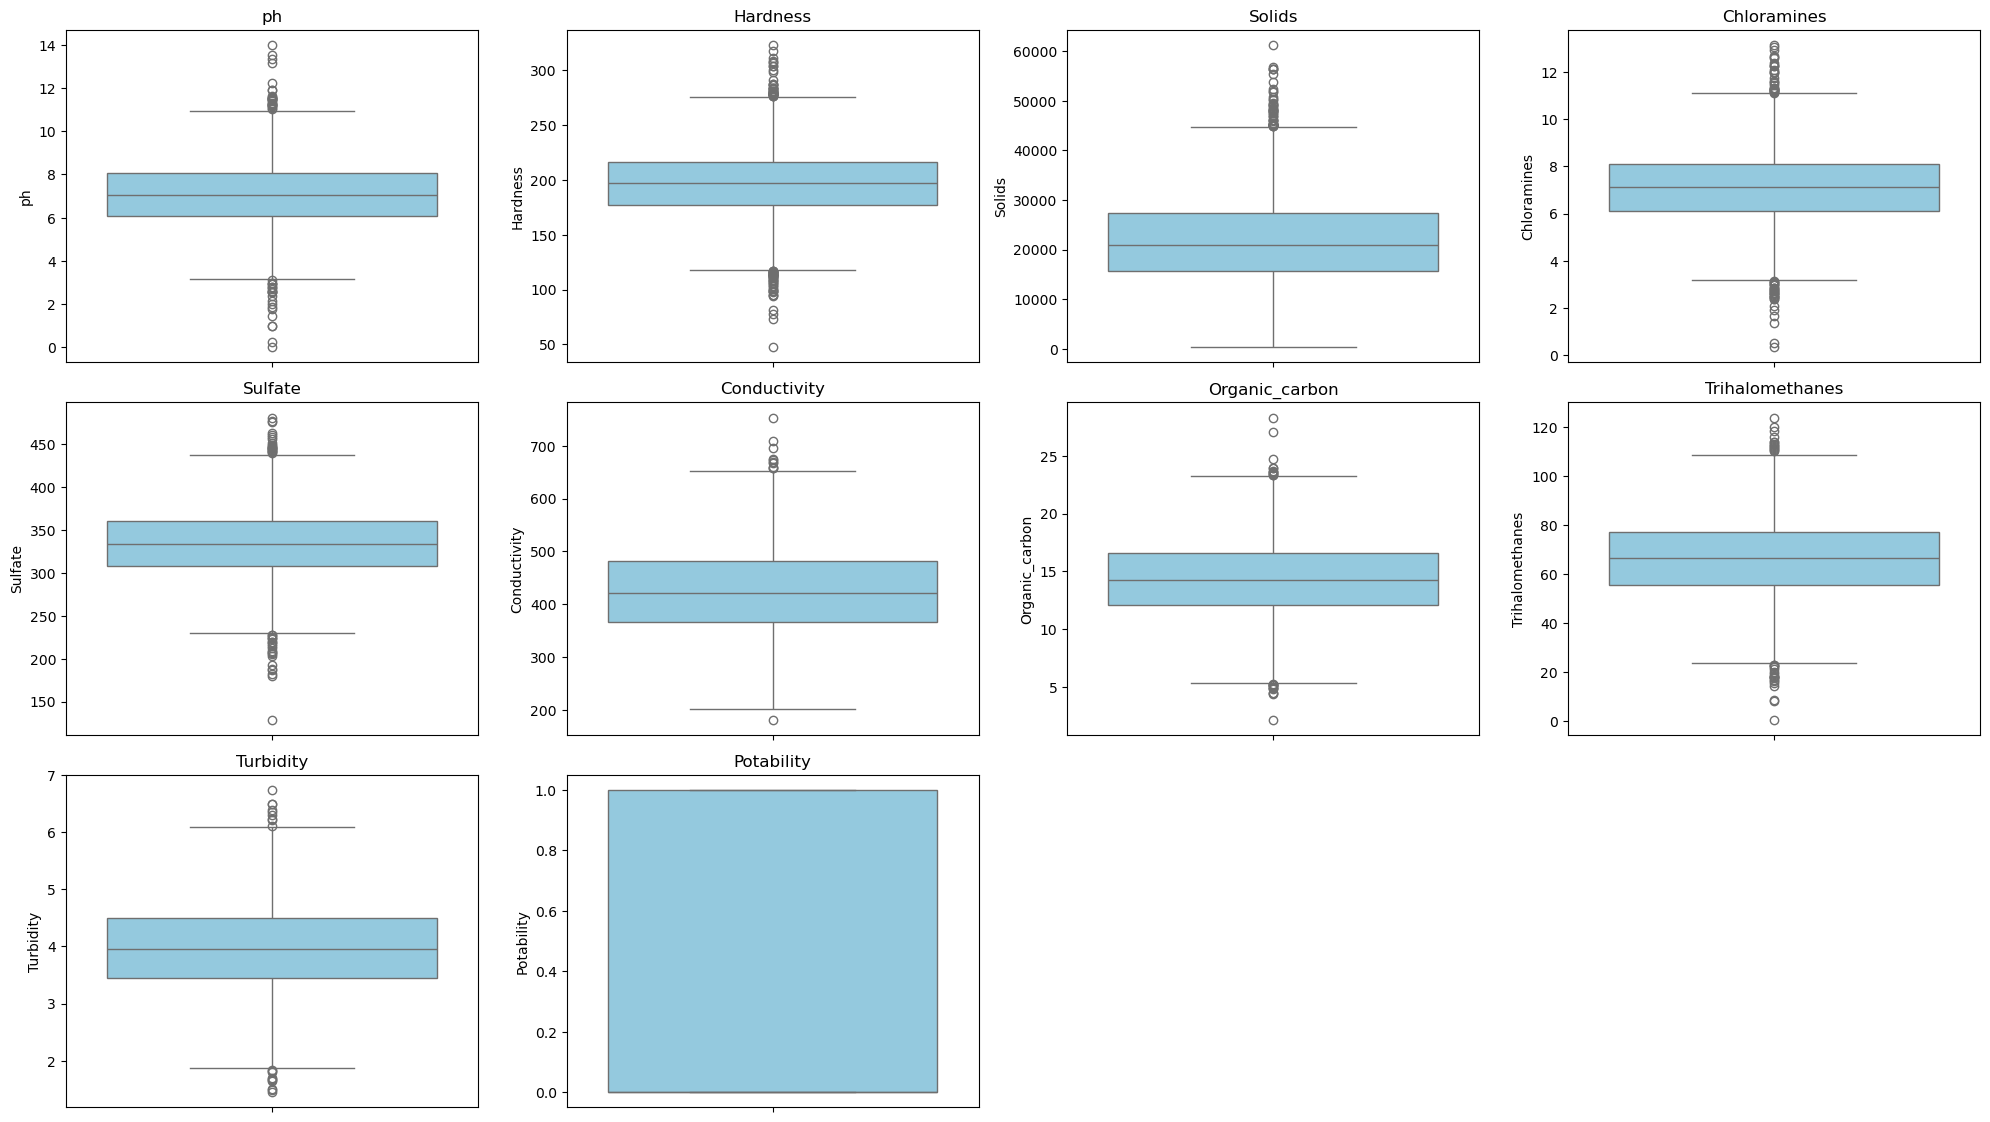

In [40]:

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the subplots
plt.figure(figsize=(20, 15))

# Loop through each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)  # adjust rows and columns depending on how many features
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


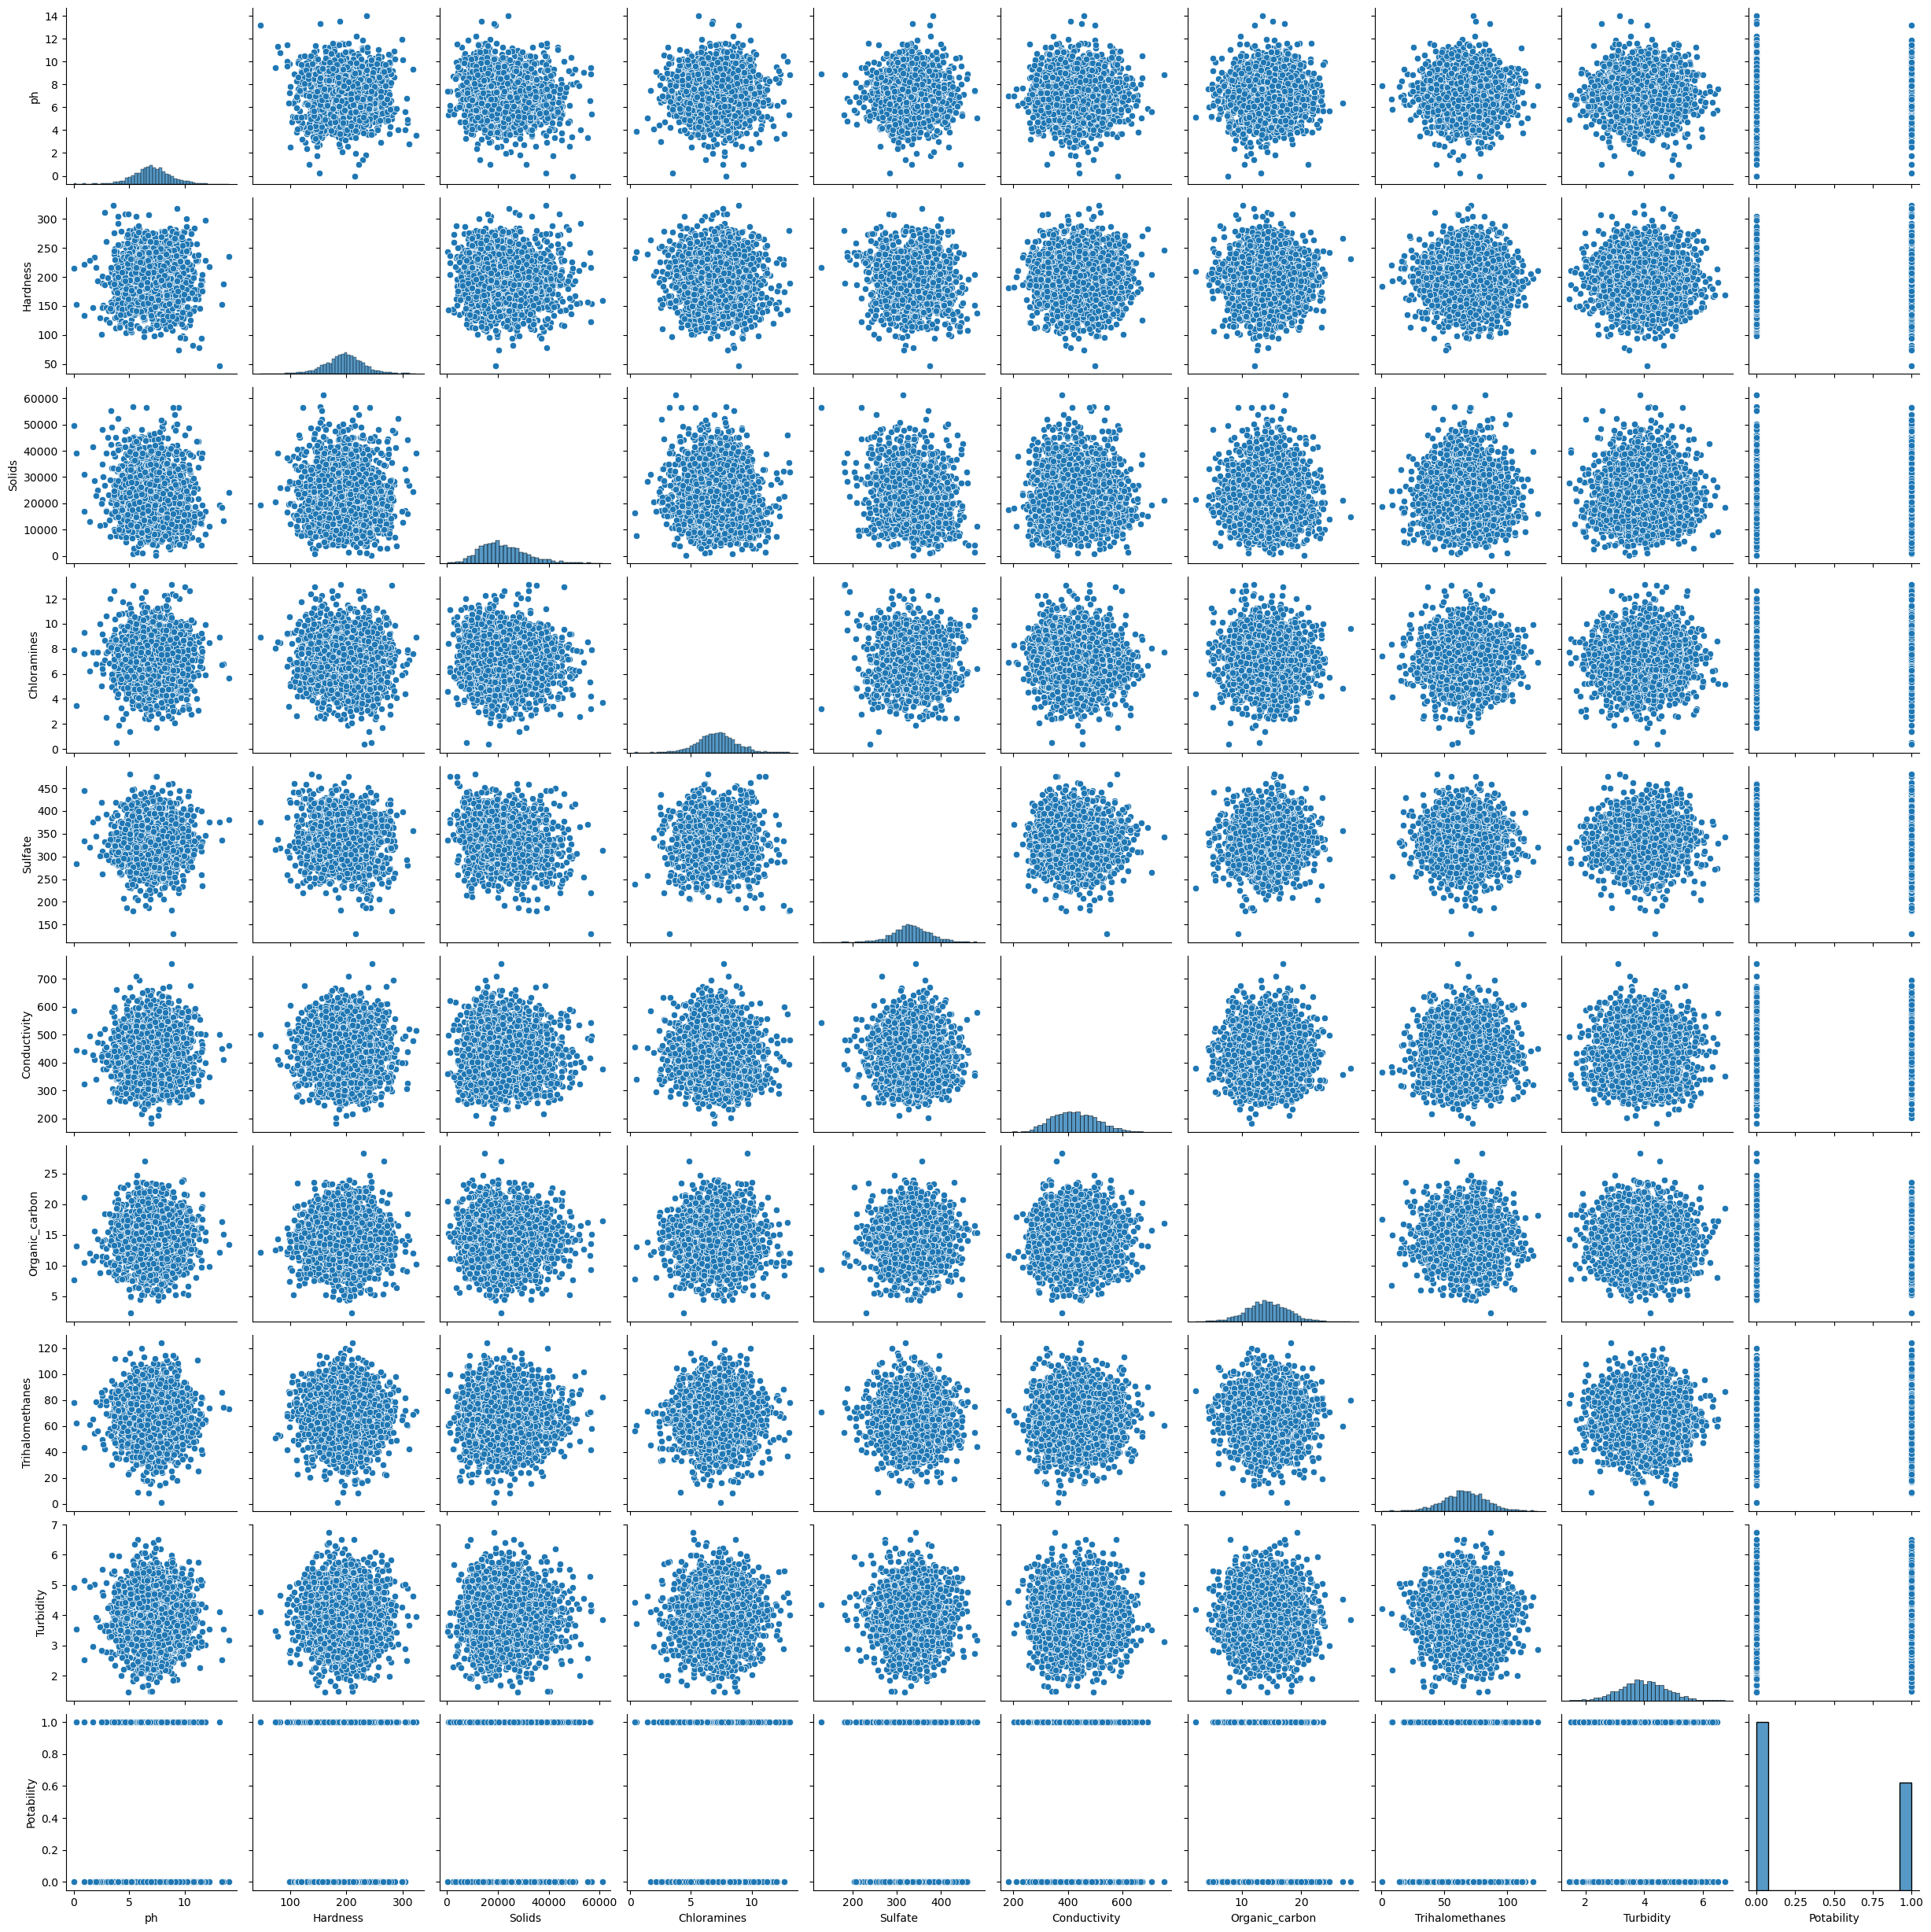

In [42]:
sns.pairplot(data)

In [44]:
import plotly.express as px 

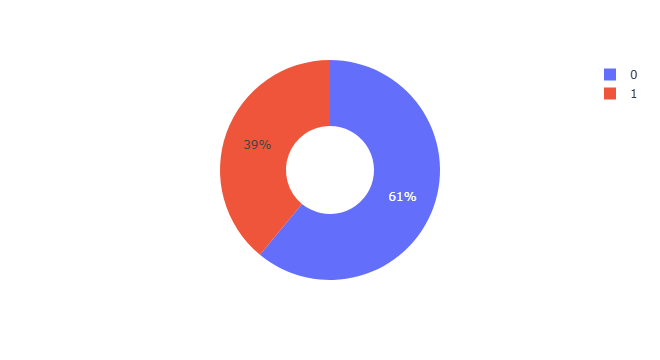

In [50]:
fig=px.pie(data,names="Potability",hole=0.4,template="plotly")
fig.show()

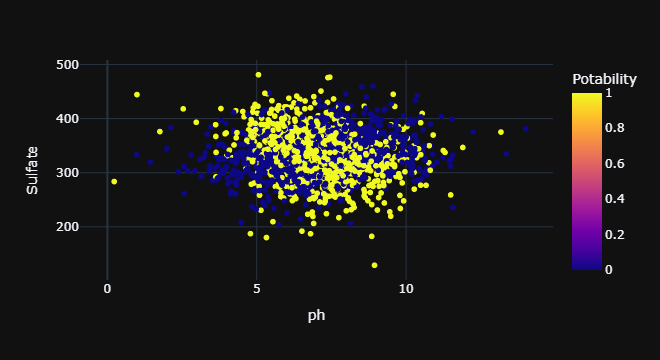

In [58]:
fig=px.scatter(data,x="ph",y="Sulfate",color="Potability",template="plotly_dark")
fig.show()

In [60]:
## yellow colour has the potability 1 and the blue colour has the potability 0

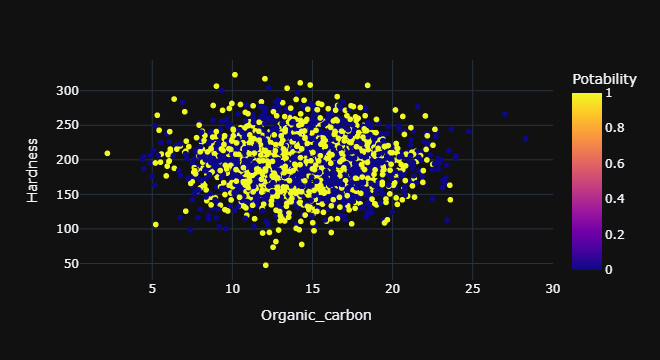

In [62]:
fig=px.scatter(data,x="Organic_carbon",y="Hardness",color="Potability",template="plotly_dark")
fig.show()

## dealing with the null value

In [65]:
## we will fill the null value with the mean of that particular columns

In [67]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Text(0, 0.5, 'Percentage of missing values')

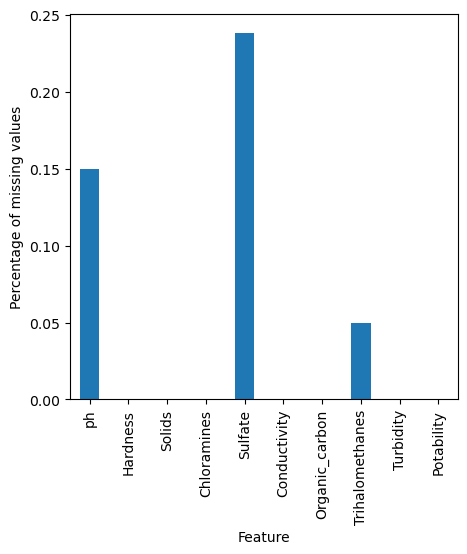

In [69]:
data.isnull().mean().plot.bar(figsize=(5,5))
plt.xlabel("Feature")
plt.ylabel("Percentage of missing values")

In [71]:
data["ph"]=data["ph"].fillna(data["ph"].mean())
data["Sulfate"]=data["Sulfate"].fillna(data["Sulfate"].mean())
data["Trihalomethanes"]=data["Trihalomethanes"].fillna(data["Trihalomethanes"].mean())

In [73]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

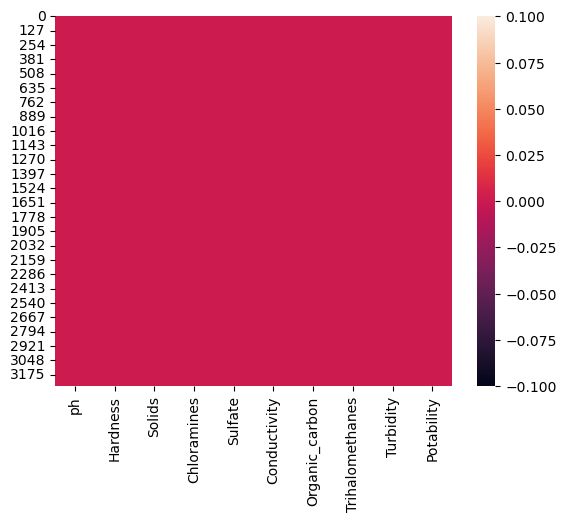

In [75]:
sns.heatmap(data.isnull())

In [79]:
## null values get removed

In [83]:
# now we will do scaling of the data of numerical values so that our data set come in the same range
# scalling also help to understand the data eaisly in ml

In [85]:
## for scaling we will saperate the data in feature and target

In [89]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [95]:
x=data.drop("Potability",axis=1)#feature(it has value between  1 and 0)
y=data["Potability"]#scalling

In [97]:
x.shape

(3276, 9)

In [99]:
y.shape

(3276,)

In [103]:
data.shape

(3276, 10)

In [105]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()
x=scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [112]:
from sklearn.model_selection import train_test_split

In [220]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [118]:
x_train.shape

(2620, 9)

In [120]:
y_train.shape

(2620,)

In [124]:
x_test.shape

(656, 9)

## Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

In [133]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [135]:
model_lr=LogisticRegression()

In [137]:
## training amodel
model_lr.fit(x_train,y_train)

LogisticRegression()

In [139]:
#making prediction
pred_lg=model_lr.predict(x_test)

In [143]:
#checking accuracy
accuracy_score_lr=accuracy_score(y_test,pred_lg)
accuracy_score_lr

0.6112804878048781

## Decission Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
model_dt=DecisionTreeClassifier(max_depth=4)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [152]:
##making prediction using decision tree
pred_dt=model_dt.predict(x_test)

In [154]:
pred_dt

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [156]:
accuracy_score_dt=accuracy_score(y_test,pred_dt)

In [158]:
accuracy_score_dt

0.6295731707317073

In [164]:
#confusion matrix
con=confusion_matrix(y_test,pred_dt)
con

array([[393,   8],
       [235,  20]], dtype=int64)

In [166]:
## for o 393 has correct predection and 8 wrong predection
# for 1 235 has correct predection and 20 wrong 

## Random Forest Classifier

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [177]:
## making predection
pred_rf=model_rf.predict(x_test)

In [181]:
accuracy_score_rf=accuracy_score(y_test,pred_rf)

In [183]:
accuracy_score_rf*100

65.54878048780488

In [185]:
conr=confusion_matrix(y_test,pred_rf)
conr

array([[353,  48],
       [178,  77]], dtype=int64)

  ## KNN-K-NearestNeigbors

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
for i in range(5,20):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn=model_knn.predict(x_test)
    accuracy_score_knn=accuracy_score(y_test,pred_knn)
    print(i,accuracy_score_knn)

5 0.6082317073170732
6 0.6204268292682927
7 0.614329268292683
8 0.6173780487804879
9 0.6112804878048781
10 0.6234756097560976
11 0.6173780487804879
12 0.6204268292682927
13 0.6310975609756098
14 0.625
15 0.635670731707317
16 0.6310975609756098
17 0.6310975609756098
18 0.6219512195121951
19 0.6234756097560976


In [207]:
    model_knn = KNeighborsClassifier(n_neighbors=15)
    model_knn.fit(x_train,y_train)
    pred_knn=model_knn.predict(x_test)
    accuracy_score_knn=accuracy_score(y_test,pred_knn)
    print(accuracy_score_knn)

0.635670731707317


## Support Vector Classifier

In [212]:
from sklearn.svm import SVC

In [214]:
model_svm=SVC(kernel="rbf")

In [216]:
model_svm.fit(x_train,y_train)

SVC()

In [224]:
pred_svm=model_svm.predict(x_test)

In [228]:
accuracy_score_svm=accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

70.42682926829268

## AdaBoost Classifiers

In [233]:
from sklearn.ensemble import AdaBoostClassifier

In [275]:
model_ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.03)

In [277]:
model_ada.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(learning_rate=0.03, n_estimators=200)

In [281]:
pred_ada=model_ada.predict(x_test)

In [283]:
accuracy_score_ada=accuracy_score(y_test,pred_ada)

In [285]:
accuracy_score_ada

0.600609756097561

## XGBoosT

In [292]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 10.1 MB/s eta 0:00:15
   - -------------------------------------- 4.2/150.0 MB 14.0 MB/s eta 0:00:11
   - -------------------------------------- 7.3/150.0 MB 14.6 MB/s eta 0:00:10
   -- ------------------------------------- 10.7/150.0 MB 14.6 MB/s eta 0:00:10
   --- ------------------------------------ 14.2/150.0 MB 14.8 MB/s eta 0:00:10
   ---- ----------------------------------- 17.0/150.0 MB 14.9 MB/s eta 0:00:09
   ----- ---------------------------------- 19.9/150.0 MB 15.0 MB/s eta 0:00:09
   ------ --------------------------------- 23.3/150.0 MB 14.9 MB/s eta 0:00:09
   ------ --------------------------------- 25.7/150.0 MB 14.7 MB/s eta 0:00:09
   ------- -------------------------------- 27.3/150.0 MB 13.7 MB/s eta 0:00:09
   -------- ------------------------------- 30.7/150.0 MB 14.1 MB/s eta 0:00:09
   --------- ------------------------------ 34.3/150

In [294]:
from xgboost import XGBClassifier

In [298]:
model_xgb=XGBClassifier(n_estiimators=200,learning_rate=0.03)

In [300]:
model_xgb.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:32:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estiimators" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estiimators=200,
              n_estimators=None, n_jobs=None, ...)

In [302]:
pred_xgb=model_xgb.predict(x_test)

In [308]:
accuracy_score_xgb=accuracy_score(y_test,pred_xgb)

In [312]:
accuracy_score_xgb

0.6417682926829268

In [324]:
models = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree",
              "Random Forest", "KNN", "SVM",
              "AdaBoost", "XGBoost"],
    "Accuracy Score": [accuracy_score_lr, accuracy_score_dt, accuracy_score_rf,
                       accuracy_score_knn, accuracy_score_svm, accuracy_score_ada,
                       accuracy_score_xgb]
})


In [326]:
models

Model  Accuracy Score
0  Logistic Regression        0.611280
1        Decision Tree        0.629573
2        Random Forest        0.655488
3                  KNN        0.635671
4                  SVM        0.704268
5             AdaBoost        0.600610
6              XGBoost        0.641768

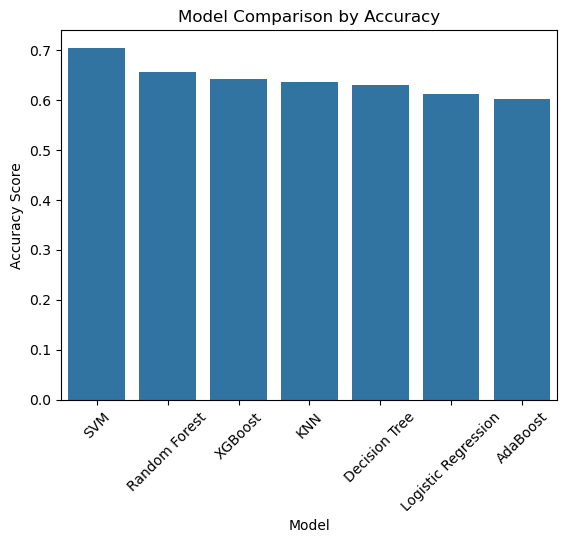

In [336]:
models.sort_values(by="Accuracy Score", ascending=False, inplace=True)

# Now plot
sns.barplot(x="Model", y="Accuracy Score", data=models)
plt.xticks(rotation=45)  # Rotate model names for better visibility
plt.title("Model Comparison by Accuracy")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10200\1289353013.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




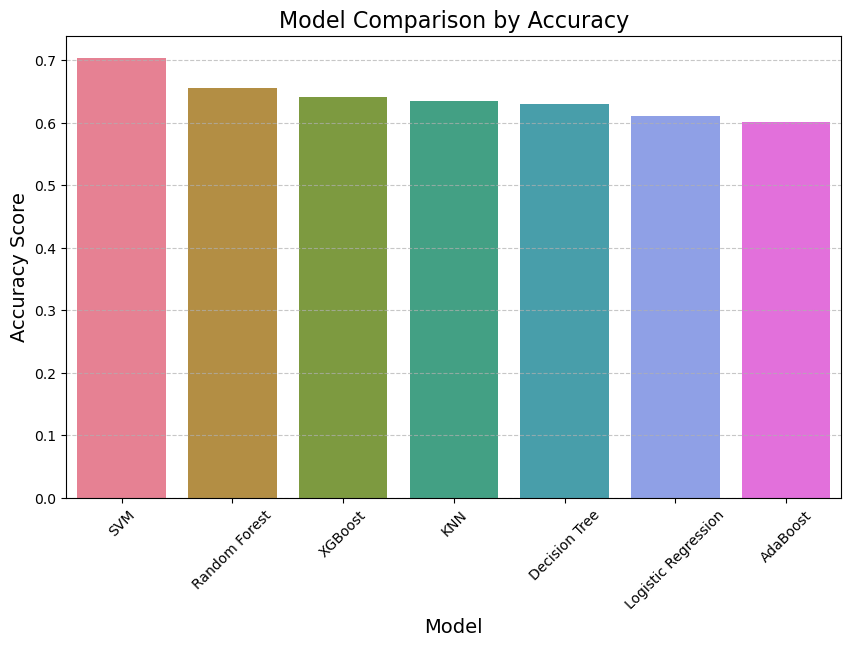

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the models by Accuracy Score
models.sort_values(by="Accuracy Score", ascending=False, inplace=True)

# Set figure size
plt.figure(figsize=(10,6))

# Set a colorful palette
colors = sns.color_palette("husl", len(models))  # "husl" gives bright distinct colors

# Plot with custom palette
sns.barplot(x="Model", y="Accuracy Score", data=models, palette=colors)

# Rotate x-axis labels and add title
plt.xticks(rotation=45)
plt.title("Model Comparison by Accuracy", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
